# Analyzing the Fifa 20 players by the given attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files= os.listdir(r'.')

for i in files:
    if i.endswith('.csv'):
        print(i)

players_15.csv
players_20.csv
teams_and_leagues.csv


In [3]:
df_fifa_15= pd.read_csv('players_15.csv')
df_fifa_20= pd.read_csv('players_20.csv')
df_teams_leagues= pd.read_csv('teams_and_leagues.csv')

In [4]:
#df_fifa_15['preferred_foot'].unique()

In [5]:
 df_fifa_20.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [14]:
df_fifa_20.columns[:30]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position'],
      dtype='object')

In [15]:
df_fifa_20.nation_position.unique()

array([nan, 'LS', 'LW', 'GK', 'LF', 'RCM', 'SUB', 'LCB', 'RW', 'RM', 'ST',
       'LDM', 'RCB', 'CDM', 'CAM', 'CF', 'RDM', 'RF', 'LB', 'LCM', 'LM',
       'RB', 'CB', 'CM', 'RS', 'RWB', 'LWB'], dtype=object)

In [7]:
import seaborn as sns; 

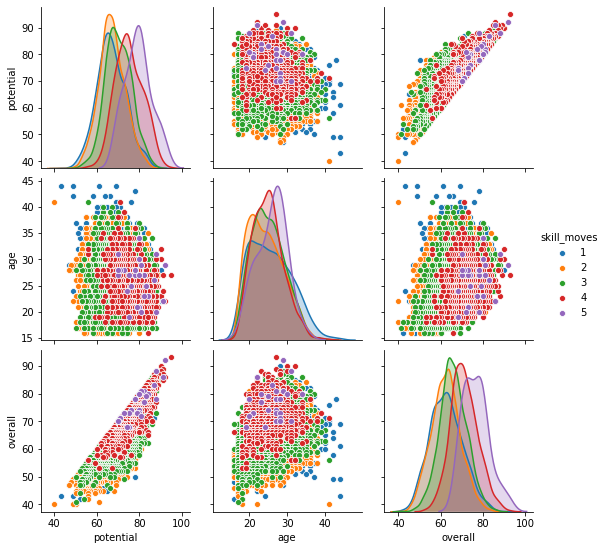

In [8]:
sns.pairplot(df_fifa_15[['potential','age', 'club','overall','preferred_foot','skill_moves']], hue='skill_moves')
plt.show()

# AGE statistics

In [9]:
min(df_fifa_15['age']), max(df_fifa_15['age'])

(16, 44)

# ODLEST players of FIFA 15 stat

In [10]:
old_player= max(df_fifa_15['age'])

In [11]:
df_fifa_15[['short_name','nationality','age','potential']][df_fifa_15['age'].values == old_player]

,short_name,nationality,age,potential
3676,Kim Byung Ji,Korea Republic,44,69
10504,A. Pierobon,Italy,44,61
15282,P. Mathers,Scotland,44,49
15455,B. Richardson,England,44,43


# FC bareclona PLAYERS

In [30]:
barcelona_15= df_fifa_15[['short_name','nationality','age','overall','potential','player_positions']][df_fifa_15['club'].values == 'FC Barcelona'].sort_values(by=['potential','age'], ascending= False)

In [33]:
barcelona_20= df_fifa_20[['short_name','nationality','age','overall','potential','player_positions']][df_fifa_20['club'].values == 'FC Barcelona'].sort_values(by=['age'], ascending= False)

# BARCA players info potential

In [34]:
barcelona_15

,short_name,nationality,age,overall,potential,player_positions
0,L. Messi,Argentina,27,93,95,CF
5,L. Suárez,Uruguay,27,89,91,"ST, CF"
19,Neymar,Brazil,22,86,91,LW
44,Piqué,Spain,27,84,89,CB
32,Sergio Busquets,Spain,25,85,89,"CDM, CM"
101,M. ter Stegen,Germany,22,82,88,GK
27,Xavi,Spain,34,86,86,CM
71,Pedro,Spain,26,83,86,"LW, RW"
158,Jordi Alba,Spain,25,81,85,LB
75,I. Rakitić,Croatia,26,83,84,"CAM, CM"


In [35]:
barcelona_20

,short_name,nationality,age,overall,potential,player_positions
0,L. Messi,Argentina,32,94,94,"RW, CF, ST"
19,L. Suárez,Uruguay,32,89,89,ST
29,Piqué,Spain,32,88,88,CB
142,A. Vidal,Chile,32,84,84,"CM, CDM"
64,I. Rakitić,Croatia,31,86,86,"CM, CDM"
21,Sergio Busquets,Spain,30,89,89,"CDM, CM"
51,Jordi Alba,Spain,30,87,87,LB
91,Neto,Brazil,29,85,86,GK
22,A. Griezmann,France,28,89,89,"CF, ST, LW"
6,M. ter Stegen,Germany,27,90,93,GK
